## Visualization

### Imports and Libraries

In [1]:
seed = 42
import numpy as np
np.random.seed(seed)
import librosa
import os
import matplotlib.pyplot as plt

### Waveforms

**Waveforms** are visual representations of an audio signal over time. The x-axis represents time, while the y-axis represents amplitude (loudness). 
By plotting waveforms for different genres we can get an intuition of their dynamics (e.g. pauses, loud passages, percussive vs. smooth sounds) and visually compare which genres behave more similarly than others.

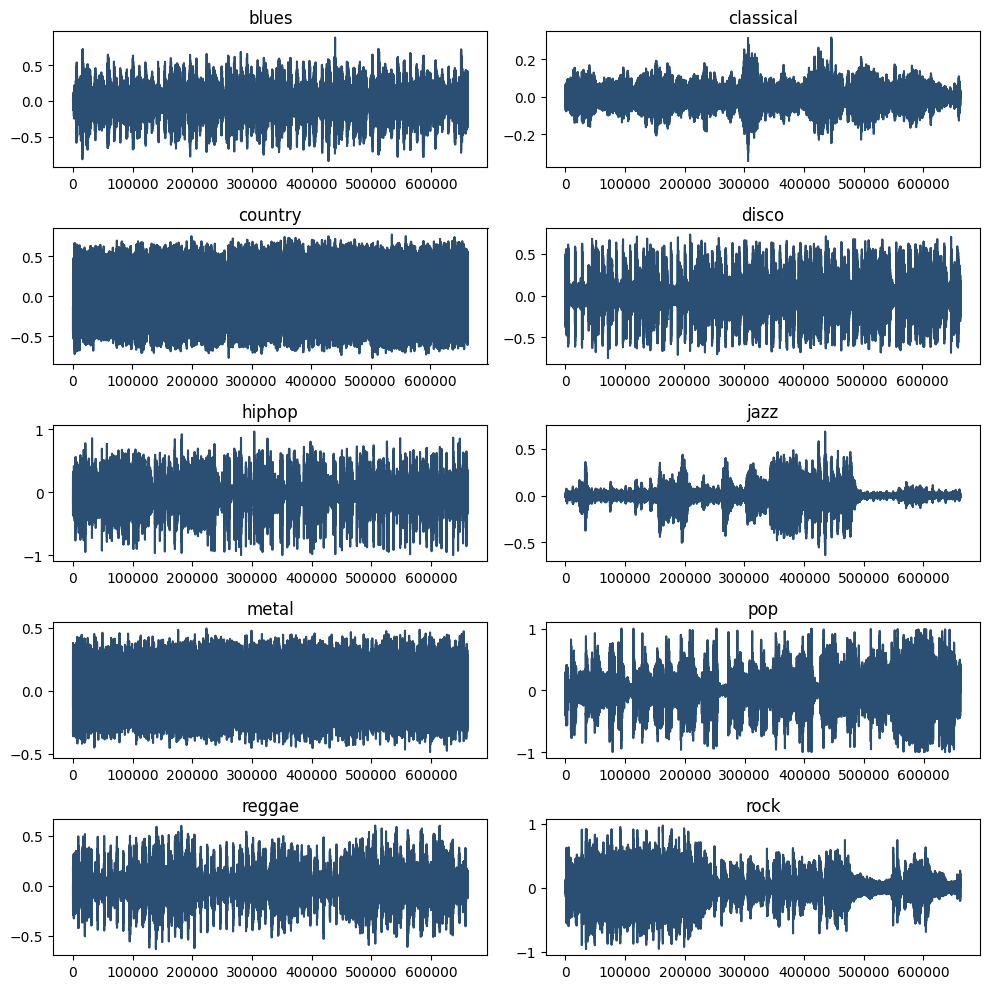

In [2]:
path = "Data/genres_original"
visual_path = []

for root, dirs, files in os.walk(path):
    if files:
        file_path = os.path.join(root, files[0])
        visual_path.append(file_path)

fig, axes = plt.subplots(5, 2, figsize=(10, 10))

for i, path in enumerate(visual_path):
    data, sr = librosa.load(path)

    genre_label = os.path.basename(os.path.dirname(path))
    ax = axes[i // 2, i % 2]
    ax.plot(data, color="#2A4F72")
    ax.set_title(genre_label)

plt.tight_layout()
plt.show()


### Spectrogram

A **spectrogram** is a time–frequency representation of an audio signal. The x-axis represents time, the y-axis represents frequency, and the colour encodes the magnitude (energy) at each time–frequency bin.  
Spectrograms are more informative than raw waveforms: they make it easier to see
harmonics, percussive onsets and timbral differences across genres, and how the
energy distribution evolves over time.

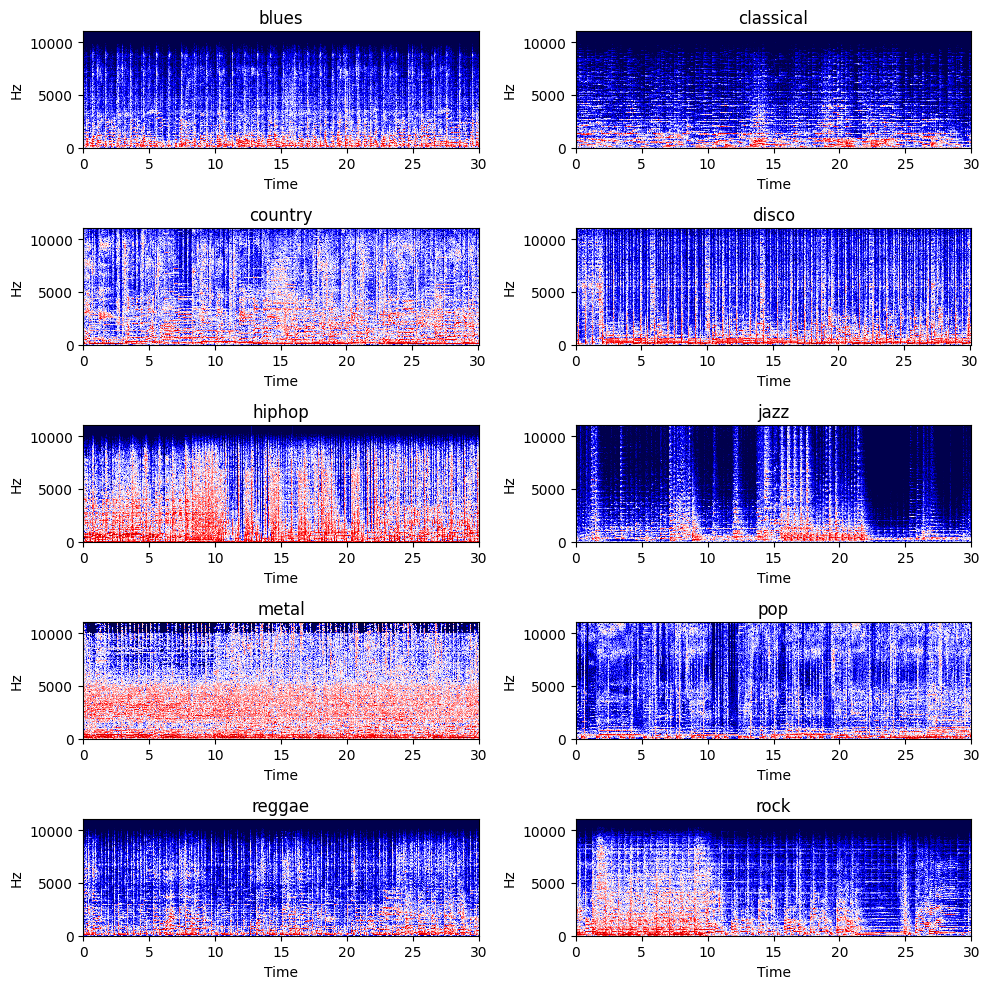

In [3]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))

for i, path in enumerate(visual_path):
    data, sr = librosa.load(path)

    stft = librosa.stft(data)
    stft_db = librosa.amplitude_to_db(abs(stft))

    genre_label = os.path.basename(os.path.dirname(path))

    ax = axes[i // 2, i % 2]
    librosa.display.specshow(stft_db, sr=sr, x_axis='time',y_axis='hz',cmap='seismic', ax=ax)

    ax.set_title(genre_label)


plt.tight_layout()
plt.show()